<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster_MSAC/blob/main/gg_94_OpenCV_%EC%9A%B0%ED%8E%B8%EB%B2%88%ED%98%B8_%EC%9D%BD%EA%B8%B0_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 우편번호 읽기

In [1]:
!curl -L https://www.dropbox.com/s/8qlxytrdn3ffaov/im-hagaki1.png --output hagaki1.png
# !curl -L https://github.com/wikibook/python-ml-app-dev/blob/master/ch3/zipno/digits.pkl --output digits.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   122  100   122    0     0    193      0 --:--:-- --:--:-- --:--:--   193
100    17  100    17    0     0     16      0  0:00:01  0:00:01 --:--:--    16
100  133k  100  133k    0     0  96910      0  0:00:01  0:00:01 --:--:-- 2575k


In [2]:
import cv2
import matplotlib.pyplot as plt
import joblib

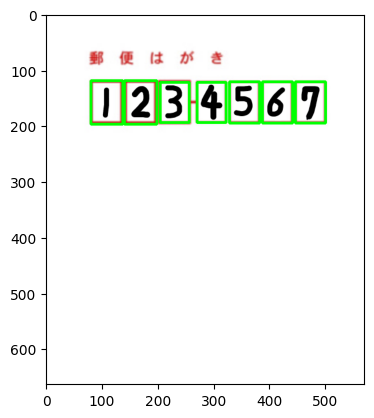

In [3]:
# 엽서 이미지에서 우편 번호를 추출하는 함수
def detect_zipno(fname):
    # 이미지 읽어 들이기
    img = cv2.imread(fname)
    # 이미지 크기 구하기
    h, w = img.shape[:2]
    # 이미지의 오른쪽 윗부분만 추출하기 --- (*1)
    img = img[0:h//2, w//3:]

    # 이미지 이진화하기 --- (*2)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]

    # 윤곽 검출하기 --- (*3)
    cnts = cv2.findContours(im2,
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]

    # 추출한 이미지에서 윤곽 추출하기--- (*4)
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        # 너무 크거나 너무 작은 부분 제거하기 --- (*5)
        if not(50 < w < 70): continue
        result.append([x, y, w, h])
    # 추출한 윤곽을 위치에 따라 정렬하기 --- (*6)
    result = sorted(result, key=lambda x: x[0])
    # 추출한 윤곽이 너무 가까운 것들 제거하기 --- (*7)
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10: continue
        result2.append([x, y, w, h])
        lastx = x
    # 초록색 테두리 출력하기 --- (*8)
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

if __name__ == '__main__':
    # 이미지를 지정해서 우편번호 추출하기
    cnts, img = detect_zipno("hagaki1.png")

    # 결과 출력하기
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi=200)
    plt.show()

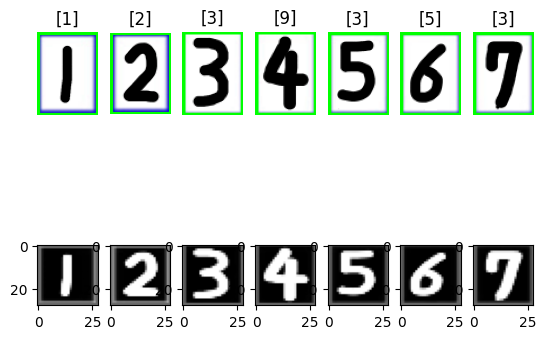

In [19]:
import joblib
clf = joblib.load("digits2.pkl")

cnts, img = detect_zipno("hagaki1.png")
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    im2 = img[y:y+h, x:x+w]
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # 그레이스케일
    im2gray = cv2.resize(im2gray, (28, 28)) # 크기 변경
    im2gray = 255 - im2gray         # 흑백 반전 and 8-bit 변환
    im2gray = im2gray.reshape((-1, 28*28))   # 차원 변환
    res = clf.predict(im2gray)
    plt.subplot(2, len(cnts), i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)
    plt.subplot(2, len(cnts), i + 1 + len(cnts))
    plt.imshow(im2gray.reshape(28,28), cmap="gray")

plt.show()